# The Sparks Foundation

# Graduate Rotational Internship Program

# Task 2

# Prediction using Unsupervised ML

(Level - Beginner)
● From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

# by Sandeep VY 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Loading datasets

In [2]:
iris_data = datasets.load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Finding the optimal number of clusters for K-means using elbow method

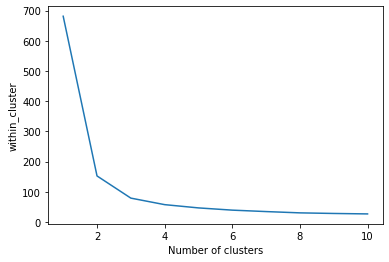

In [4]:
x = iris_df.iloc[:, [0,1,2,3]].values
within_cluster = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    within_cluster.append(kmeans.inertia_)

    
#plot
plt.plot(range(1, 11), within_cluster)
plt.xlabel('Number of clusters')
plt.ylabel('within_cluster')
plt.show()

# Apply KMeans to the dataset

In [23]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [19]:
plt.rcParams['figure.figsize'] = (8,3)

# Clustered data visualization

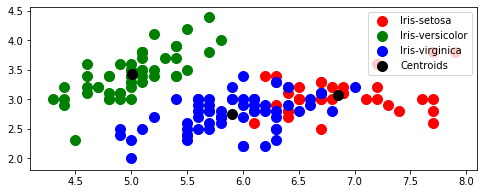

In [24]:
#for first 2 columns
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'green', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'blue', label = 'Iris-virginica')

#plot the centroid of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.show()